In [4]:
## Reinforcement Learning Part 1

# Import necessary libraries
import numpy as np

# Define the graph and rewards
graph = np.array([
    [-1, -1, -1, -1, 0, -1],
    [-1, -1, -1, 0, -1, 100],
    [-1, -1, -1, 0, -1,- 11],
    [-11 ,0 ,0 ,-11 ,0 ,-11 ],
    [0 ,-11 ,-11 ,0 ,-11 ,100 ],
    [-11 ,0 ,-11 ,-11 ,0 ,100 ]
])

# Initialize Q-table with zeros
q_table = np.zeros_like(graph, dtype=np.float32)

# Hyperparameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = np.random.randint(0, graph.shape[0])
    while current_state != 5:  # Goal state
        possible_actions = np.where(graph[current_state] >= 0)[0]
        action = np.random.choice(possible_actions)
        next_state = action
        future_rewards = []
        for next_action in range(graph.shape[0]):
            future_rewards.append(q_table[next_action, :].max())
        q_table[current_state, action] = graph[current_state, action] + \
            learning_rate * (discount_factor * max(future_rewards) - q_table[current_state, action])
        current_state = next_state

# Extract the optimal policy
current_state = 0
optimal_path = [current_state]
while current_state != 5:  # Goal state
    action = np.argmax(q_table[current_state])
    current_state = action
    optimal_path.append(current_state)

# Visualize the optimal path
print("Optimal Path:", optimal_path)


Optimal Path: [0, 4, 5]


Summary Statistics:
              Age
count  1000.00000
mean     41.54500
std      14.07025
min      18.00000
25%      29.00000
50%      42.00000
75%      54.00000
max      64.00000


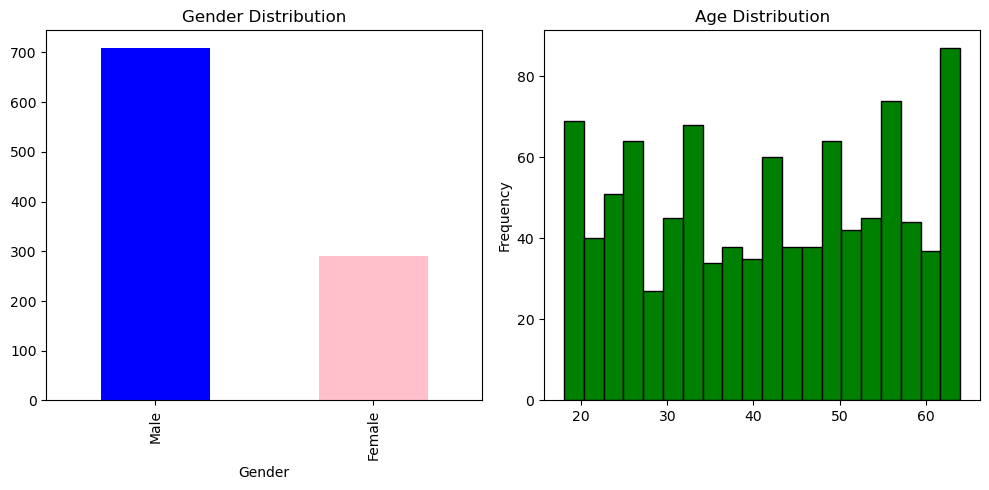

In [6]:
## Reinforcement Learning Part 2

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset with bias
np.random.seed(0)
num_samples = 1000

# Generate gender distribution with bias
gender = np.random.choice(['Male', 'Female'], size=num_samples, p=[0.7, 0.3])

# Generate age distribution with bias
age_range = range(18, 65)
age_probs = [0.01] * (65 - 18)  # Equal probability for each age initially
age_probs = np.array(age_probs) / np.sum(age_probs)  # Normalize probabilities
age = np.random.choice(age_range, size=num_samples, p=age_probs)

# Create DataFrame
df = pd.DataFrame({'Gender': gender, 'Age': age})

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Visualize distributions
plt.figure(figsize=(10, 5))

# Plot gender distribution
plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')

# Plot age distribution
plt.subplot(1, 2, 2)
df['Age'].plot(kind='hist', bins=20, color='green', edgecolor='black')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()
